## Numpy

In [ ]:
# Look at the numpy cheatsheet
# https://assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf

## Pandas

In [10]:
import pandas as pd

# Just a fun fact
url = 'https://en.wikipedia.org/wiki/Special:Random'

df_list = pd.read_html(url)
print(df_list, len(df_list))

[  Personal information         Personal information.1
0            Full name  張 照圳, Pinyin: Zhāng Zhào-zhèn
1          Nationality                      Taiwanese
2                 Born       1 December 1966 (age 57)
3                Sport                          Sport
4                Sport                     Gymnastics,     0                                                  1
0 NaN  This biographical article related to Taiwanese...] 2


## Get content from pastebin

In [30]:
import requests
import string

# Pastebin url
url = "https://pastebin.com/raw/ENyYffaq"

response = requests.get(url)

# print(dir(response))
print("Status code:", response.status_code)
# print("Content: ", response.content)
print("Content encoding:", response.encoding)

content_str = response.content.decode("utf-8")
print(content_str[:199])

Status code: 200
Content encoding: utf-8
-20 -23555.255109
-19 -20173.3974282
-18 -17132.3837602
-17 -14411.0122397
-16 -11995.5143165
-15 -9866.56079994
-14 -8003.20516776
-13 -6391.33486532
-12 -5011.46272799
-11 -3846.72649659



## Scipy


In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [77]:
# Prepare the data 

data = [line.strip().split(' ') for line in content_str.splitlines()]
x = np.array([float(point[0]) for point in data])
y = np.array([float(point[1]) for point in data])

Fitted polynomial coefficients: [ 2.99999264  1.00106185 -2.00736185  3.91800201]
Initial guesses: [-1.43463629]
Roots of the polynomial: [-1.43463629]


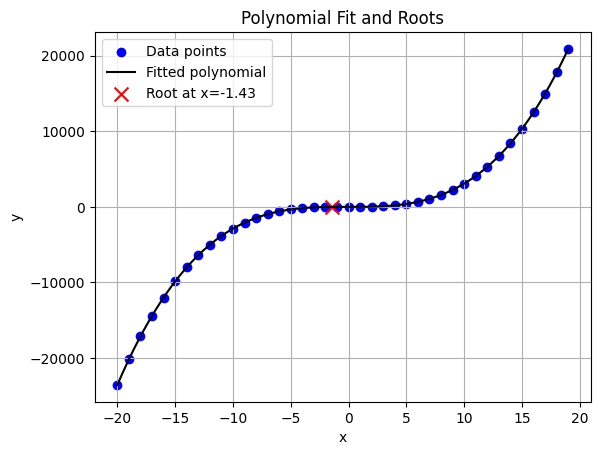

Roots of the polynomial (from SymPy): [-1.43463628747813, 0.550474093424379 - 0.779304968597882*I, 0.550474093424379 + 0.779304968597882*I]


In [78]:
coeffs = np.polyfit(x, y, 3)
print("Fitted polynomial coefficients:", coeffs)

def poly_func(x):
    # Is pow more accurate?
    return coeffs[0]*x**3 + coeffs[1]*x**2 + coeffs[2]*x + coeffs[3]

# Maximum of three roots
roots_guessed = np.roots(coeffs)
initial_guesses = roots_guessed[np.isreal(roots_guessed)].real

# What if you put a bad initial guess
# initial_guesses = [1, 2, 3]

print("Initial guesses:", initial_guesses)

roots = fsolve(poly_func, initial_guesses)
print("Roots of the polynomial:", roots)

# How smooth do you want your curve to be?
x_range = np.linspace(min(x), max(x), 500)
y_fitted = np.polyval(coeffs, x_range)

plt.scatter(x, y, color='blue', label="Data points")
plt.plot(x_range, y_fitted, label="Fitted polynomial", color='black')

for root in roots[np.isreal(roots)].real:
    plt.scatter(root, poly_func(root), color='red', marker='x', s=100, label=f'Root at x={root:.2f}')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Fit and Roots')
plt.grid(True)
plt.show()

# Sympy for confirmation
import sympy as sp

x_sym = sp.Symbol('x')
polynomial = coeffs[0]*x_sym**3 + coeffs[1]*x_sym**2 + coeffs[2]*x_sym + coeffs[3]
analytical_roots = sp.solve(polynomial, x_sym)
print("Roots of the polynomial (from SymPy):", analytical_roots)

## Numba

In [91]:
from numba import jit, prange
import math

# Basic Python function for the sum
def sum_of_squares(n):
    total = 0.0
    for i in range(1, n + 1):
        total += 1 / i**2
    return total

# Numba-optimized function
@jit(nopython=True)
def sum_of_squares_numba(n):
    total = 0.0
    for i in range(1, n + 1):
        total += 1 / i**2
    return total

# Numba-optimized function
@jit(nopython=True, parallel=True)
def sum_of_squares_numba_parallel(n):
    total = 0.0
    for i in prange(1, n + 1):
        total += 1 / i**2
    return total

# Numpy version
def sum_of_squares_numpy(n):
    return np.sum(1 / np.arange(1, n + 1)**2)

# Parameters
n = 10000
iterations = 2000

print("Python simple version:")
%timeit for _ in range(iterations): sum_of_squares(n)

print("\nNumba version:")
%timeit for _ in range(iterations): sum_of_squares_numba(n)

print("\nNumba (parallel) version:")
%timeit for _ in range(iterations): sum_of_squares_numba_parallel(n)

print("\nNumpy version:")
%timeit for _ in range(iterations): sum_of_squares_numpy(n)

print("--------------------------------------------")

print("Result from Python function:", sum_of_squares(n))
print("Result from Numba function:", sum_of_squares_numba(n))
print("Result from Numba (parallel) function:", sum_of_squares_numba_parallel(n))
print("Result from Numpy function:", sum_of_squares_numba(n))

# There may be some floating precision error in the parallel one
assert math.isclose(sum_of_squares(n), sum_of_squares_numba(n), rel_tol=1e-9)
assert math.isclose(sum_of_squares(n), sum_of_squares_numba_parallel(n), rel_tol=1e-9)
assert math.isclose(sum_of_squares(n), sum_of_squares_numpy(n), rel_tol=1e-9)

Python simple version:
1.07 s ± 14.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Numba version:
22.8 ms ± 77.5 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)

Numba (parallel) version:
12.7 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Numpy version:
37.7 ms ± 467 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
--------------------------------------------
Result from Python function: 1.6448340718480652
Result from Numba function: 1.6448340718480652
Result from Numba (parallel) function: 1.6448340718480612
Result from Numpy function: 1.6448340718480652
